<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Semanal Nº0 - TS0
#### Tomás Altimare Bercovich

# Introducción
En este trabajo práctico se realizó un generador de señales senoidales y cuadradas a partir de su parametrización. El mismo fue escrito en leguaje Python a partir de la herramienta "Spyder 6".

# Código Completo

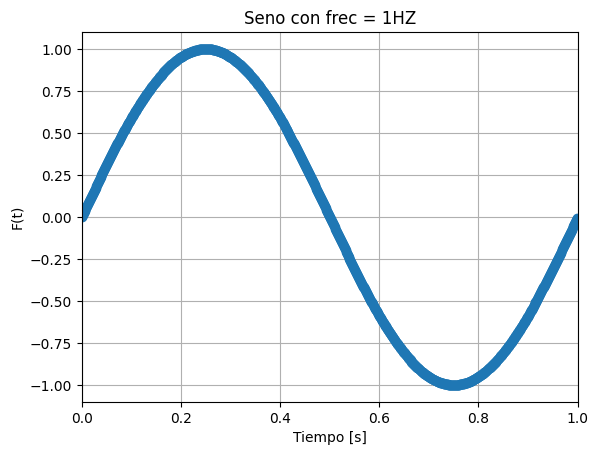

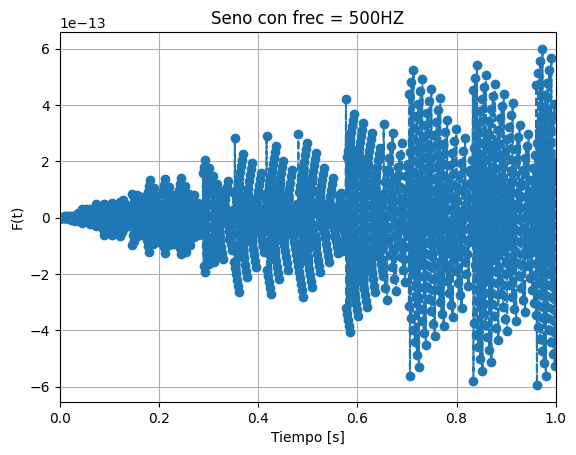

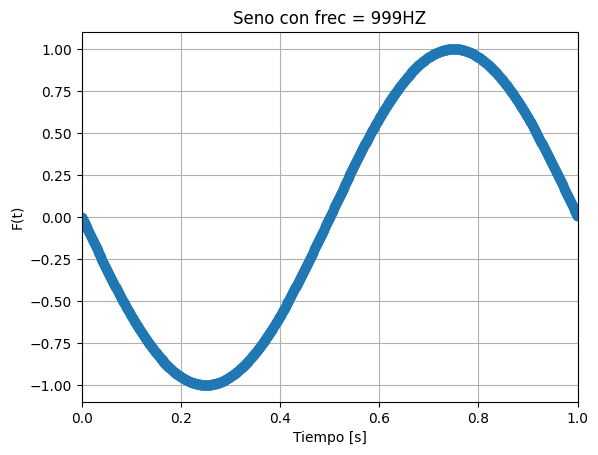

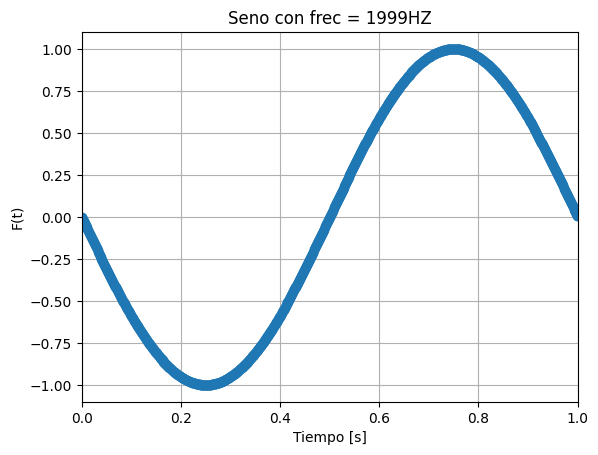

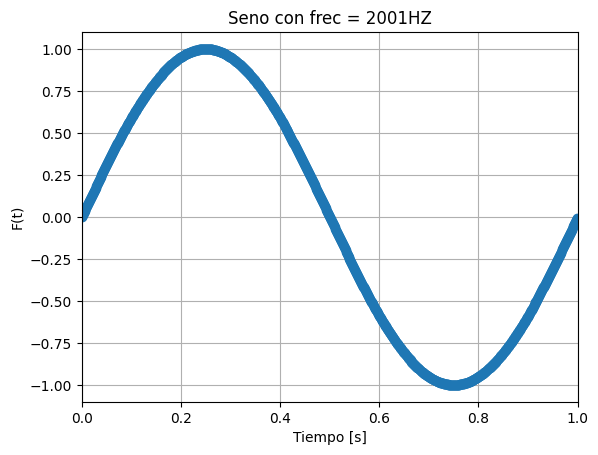

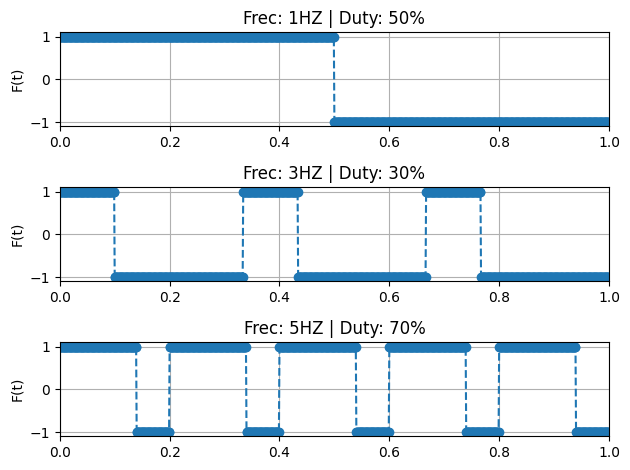

In [5]:
"""
Created on Spyder 6

@author: Tomás Altimare Bercovich

Descripción:
------------

Generador de señales: Senoidales y Función escalón (o cuadrada)
    En este programa vamos a parametrizar y llamar a una función "funcion_senoidal",
    la cual genera una señal senoidal parametrizada a partir de: 
    tt, xx = funcion_senoidal(amplitud, offset, frec, fase, #_muestras, frec_muestreo)

"""

#%% Importo los módulos y bibliotecas que voy a utilizar
import numpy as np 
"""
La uso para realizar operaciones matemáticas como el seno y para hacer la linea de tiempo tt. 
Tiene tambien funciones de algebra matricial y manejo de datos tipo array
"""
import matplotlib.pyplot as plt # La uso para imprimir el gráfico del seno

#%% Defino la función funcion_senoidal
def funcion_senoidal(vmax, dc, ff, ph, nn, fs): 
    """
    funcion_senoidal(amplitud, offset, frec, fase, #_muestras, frec_muestreo)
    - Output: tiempo (eje Y), funcion (eje X)
    """
    ts = 1/fs # tiempo/periodo de muestreo
    df = fs/nn # resolución espectral
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (nn - 1) * ts, nn).flatten() # tiempo equiespaciado
   
    xx = vmax * np.sin( 2 * np.pi * ff * tt + ph ) + dc
    return tt, xx
    
#%% Defino algunas variables del programa
fs = 1000 # frecuencia de muestreo (Hz)
N = 1000 # cantidad de muestras
T_simulacion = N/fs

#%% Llamo e imprimo a la función función_senoidal

tt, xx = funcion_senoidal (vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)

plt.figure(1)
plt.title('Seno con frec = 1HZ')
plt.grid(True)
plt.plot(tt, xx, 'o--')
plt.xlim(0, T_simulacion)
plt.xlabel("Tiempo [s]")
plt.ylabel("F(t)")

#%% Bonus 1: Ploteo la funcion senoidal con diferentes valores para la ff

t1, x1 = funcion_senoidal (vmax = 1, dc = 0, ff = 500, ph=0, nn = N, fs = fs)
t2, x2 = funcion_senoidal (vmax = 1, dc = 0, ff = 999, ph=0, nn = N, fs = fs)
t3, x3 = funcion_senoidal (vmax = 1, dc = 0, ff = 1999, ph=0, nn = N, fs = fs)
t4, x4 = funcion_senoidal (vmax = 1, dc = 0, ff = 2001, ph=0, nn = N, fs = fs)

plt.figure(2)
plt.title('Seno con frec = 500HZ')
plt.grid(True)
plt.plot(t1, x1, 'o--')
plt.xlim(0, T_simulacion)
plt.xlabel("Tiempo [s]")
plt.ylabel("F(t)")

plt.figure(3)
plt.title('Seno con frec = 999HZ')
plt.grid(True)
plt.plot(t2, x2, 'o--')
plt.xlim(0, T_simulacion)
plt.xlabel("Tiempo [s]")
plt.ylabel("F(t)")

plt.figure(4)
plt.title('Seno con frec = 1999HZ')
plt.grid(True)
plt.plot(t3, x3, 'o--')
plt.xlim(0, T_simulacion)
plt.xlabel("Tiempo [s]")
plt.ylabel("F(t)")

plt.figure(5)
plt.title('Seno con frec = 2001HZ')
plt.grid(True)
plt.plot(t4, x4, 'o--')
plt.xlim(0, T_simulacion)
plt.xlabel("Tiempo [s]")
plt.ylabel("F(t)")

#%% Bonus 2: Señal cuadrada
# Primero: Defino la funcion:
def funcion_cuadrada(vmax, dc, ff, duty, ph, nn, fs):
    """
    funcion_cuadrada(amplitud, offset, frecuencia, duty, fase, #_muestras, frec_muestreo)
    - El duty puede ir de 0 a 100
    - Salida: tt (s), xx (amplitud)
    """
    # Grilla temporal con índice entero
    n = np.arange(nn, dtype=float)
    tt = n / fs
    duty_frac = duty / 100.0

    # Fase normalizada en [0,1) (construyo la periodicidad de la funcion)
    fase = ( (ff * n / fs) + (ph / (2*np.pi)) ) % 1.0
    #      (   #_vueltas   +  )
    
    # Grafica arriba cuando fase < duty_frac, abajo en el otro caso
    xx = np.where(fase < duty_frac, vmax, -vmax) + dc
    return tt, xx

# Ahora la llamo y la ploteo con diferentes parametros:
tsq1, xsq1 = funcion_cuadrada(vmax = 1, dc = 0, ff = 1, duty = 50, ph = 0, nn = N, fs = fs)
tsq2, xsq2 = funcion_cuadrada(vmax = 1, dc = 0, ff = 3, duty = 30, ph = 0, nn = N, fs = fs)
tsq3, xsq3 = funcion_cuadrada(vmax = 1, dc = 0, ff = 5, duty = 70, ph = 0, nn = N, fs = fs)

fig, axs = plt.subplots(nrows=3, ncols=1)

axs[0].plot(tsq1, xsq1, 'o--')
axs[0].set_title('Frec: 1HZ | Duty: 50%')
axs[0].grid(True)
axs[0].set_xlim(0, T_simulacion)
axs[0].set_ylabel("Tiempo [s]")
axs[0].set_ylabel("F(t)")

axs[1].plot(tsq2, xsq2, 'o--')
axs[1].set_title('Frec: 3HZ | Duty: 30%')
axs[1].grid(True)
axs[1].set_xlim(0, T_simulacion)
axs[1].set_ylabel("Tiempo [s]")
axs[1].set_ylabel("F(t)")

axs[2].plot(tsq3, xsq3, 'o--')
axs[2].set_title('Frec: 5HZ | Duty: 70%')
axs[2].grid(True)
axs[2].set_xlim(0, T_simulacion)
axs[2].set_ylabel("Tiempo [s]")
axs[2].set_ylabel("F(t)")

plt.tight_layout() # Ajusto el plot al layout
plt.show()

# Análisis y Discusión de los Gráficos